In [1]:
import seaborn as sns
#1 Preprocessing phase.
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",encoding="ISO-8859-1",sep=";")
print('the head of df')
df.head()

the head of df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df["Embarked"].fillna('S',inplace=True)
df= df.drop(columns=['Ticket', 'PassengerId','Cabin']) 

In [3]:
def title(n):
    c=""
    liste = []
    for x in n:
        c=x.split(',')[1].split('.')[0]
        liste.append(c)
    return liste
df["Title"]=title(df['Name'])
del df['Name']
def title2(n):
    Title_Dictionary = {

                   "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona" :       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
        
        
    liste = []
    for x in n:
        
        liste.append(Title_Dictionary.get(x[1:], "nothing"))
    return liste

df["Title"]=title2(df["Title"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,male,28.0,0,0,13.0000,S,Mrs
1,No,3,male,25.0,0,0,7.6500,S,Mrs
2,No,3,male,20.0,0,0,7.8542,S,Mrs
3,No,3,female,29.0,0,4,21.0750,S,Mrs
4,No,1,male,31.0,1,0,52.0000,S,Mrs


In [4]:
df['Survived'] = df['Survived'].map({'No':0, 'Yes':1})
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Embarked']=encoder.fit_transform(df['Embarked' ])
df["Sex"]=encoder.fit_transform(df["Sex"])
df['Title']=encoder.fit_transform(df['Title' ])
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df= df.drop(columns=['SibSp', 'Parch']) 
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,1,28.0,13.0000,2,2,1
1,0,3,1,25.0,7.6500,2,2,1
2,0,3,1,20.0,7.8542,2,2,1
3,0,3,0,29.0,21.0750,2,2,5
4,0,1,1,31.0,52.0000,2,2,2


In [5]:
from sklearn.model_selection import train_test_split
X = df[["Pclass", "Age", "Sex", "FamilySize", "Fare", "Title"]]
y = df["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [8]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(random_state=0)
model= clf.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


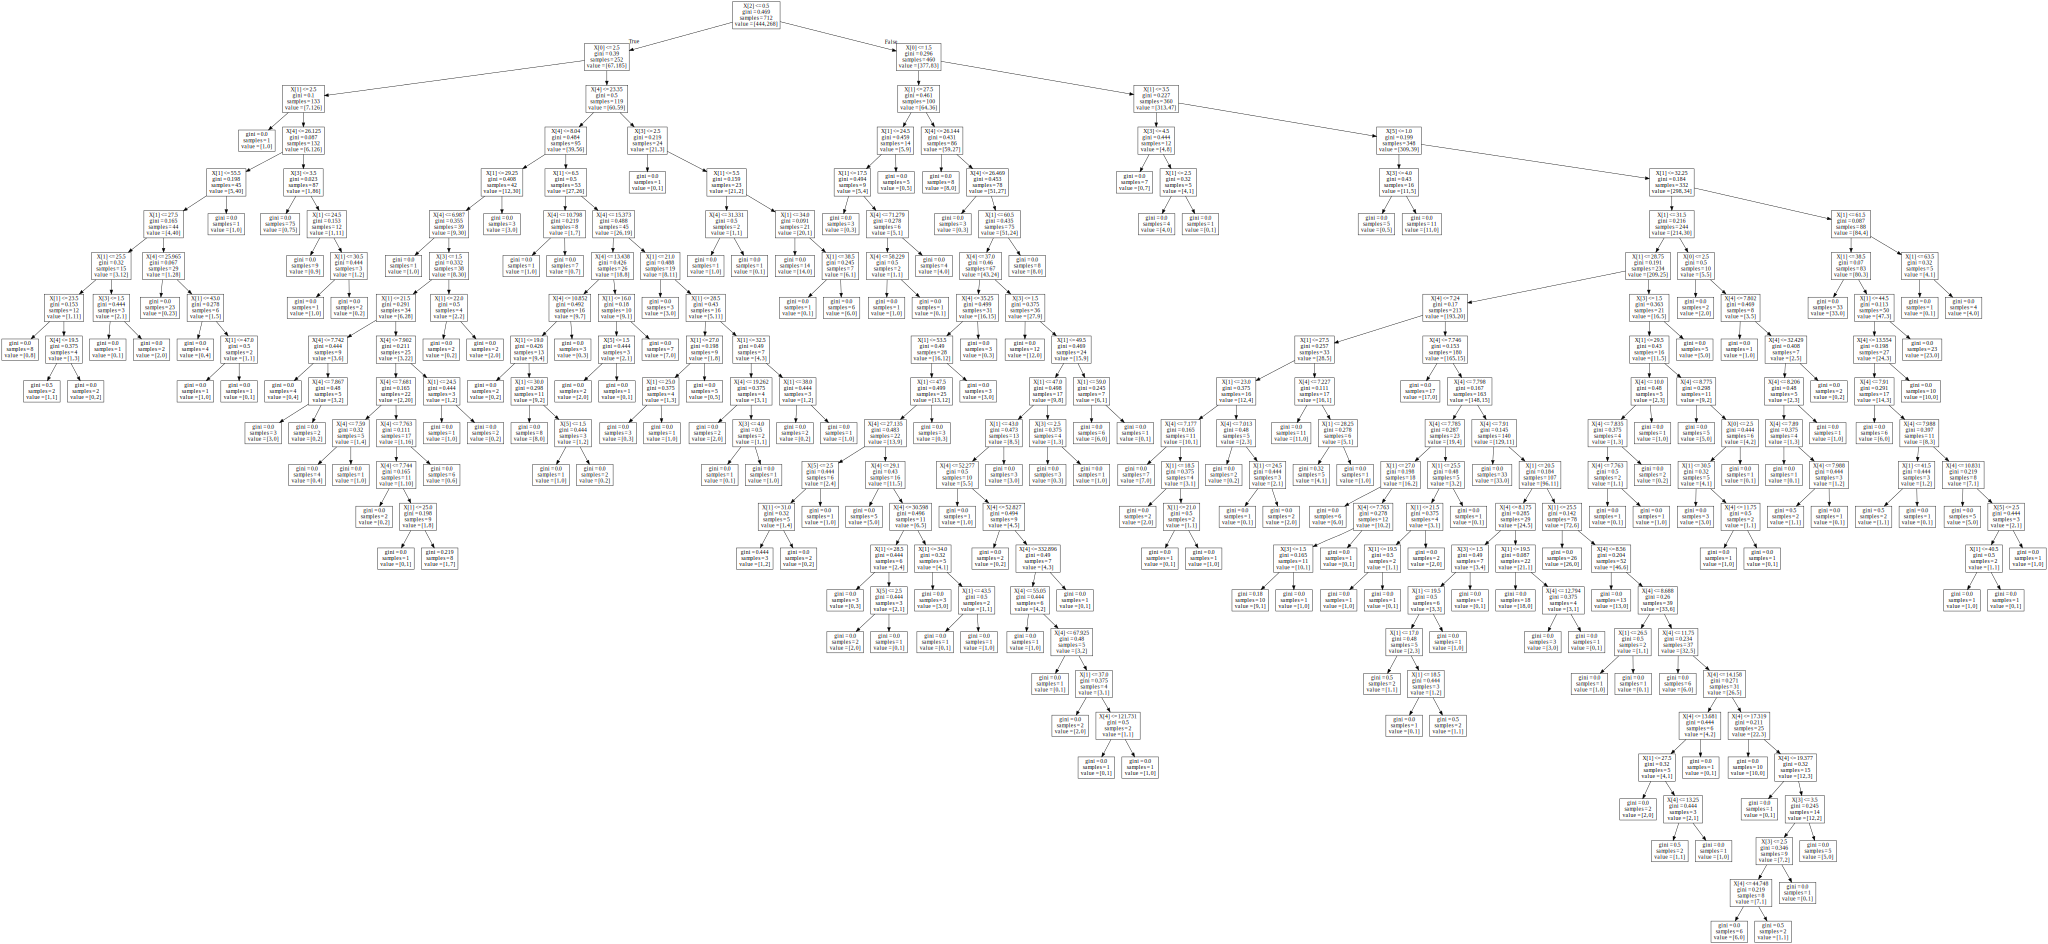

In [12]:
from sklearn.tree import export_graphviz
import graphviz
dot_data= tree.export_graphviz(model , out_file=None)
graph= graphviz.Source(dot_data)
graph.render("data")
graph

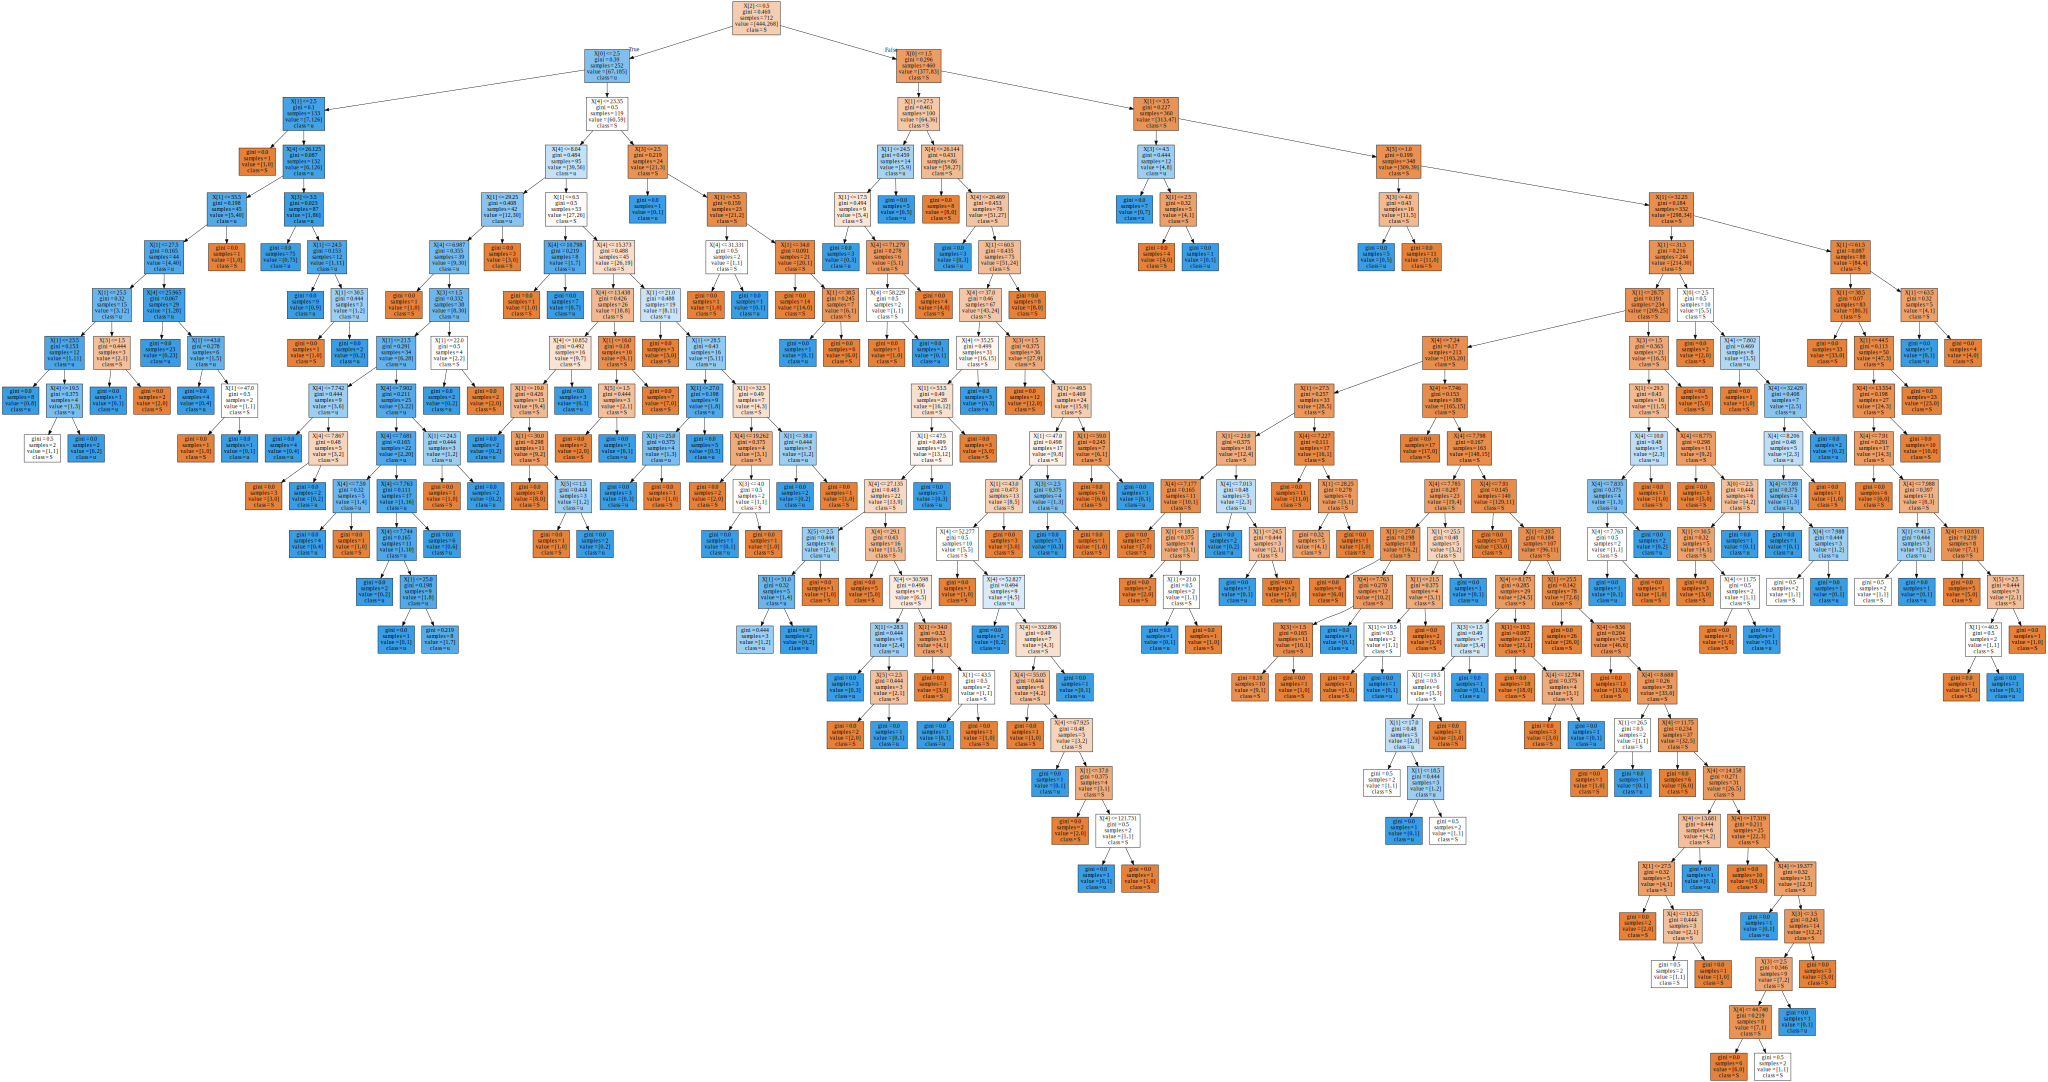

In [15]:
dot_data= export_graphviz(clf, out_file=None, 
                                
                                class_names='Survived',
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [18]:
clf = tree.DecisionTreeClassifier(criterion= "gini", splitter= "random",  max_leaf_nodes= 10, min_samples_leaf= 5, max_depth=10) 
model= clf.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))     

score:0.7988826815642458


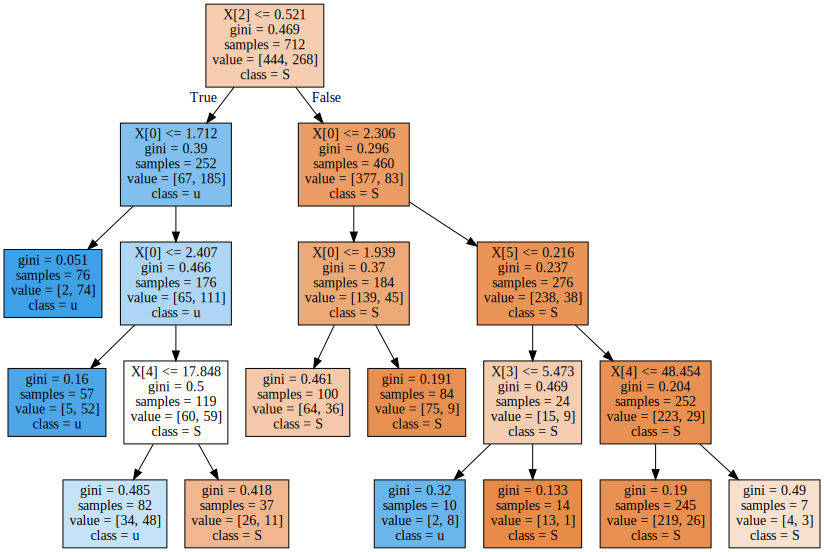

In [20]:
dot_data = export_graphviz(clf, out_file=None, 
                                
                                class_names='Survived',
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf= RandomForestClassifier()
model= clf.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8324022346368715


In [25]:
clf= RandomForestClassifier(n_estimators=150)
model= clf.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8324022346368715
